In [117]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from scipy import integrate
from scipy.stats import norm
import scikit_posthocs as sp
import statsmodels.api as sm
import seaborn as sns

## ИНТРО

Предположим, что на рынок скоро выходит новая автомобильная марка, пока что представленная всего одной моделью. У неё есть некоторая рекомендованная розничная цена (РРЦ), которая была заявлена производителем. В вашей стране эту модель могут продавать всего 3 официальных дилера (Дилер 1, 2 и 3). Так как их мало, а модель крайне интересна покупателям, то все они согласны продать машину конечному потребителю только при выполнении условия:

- Дилер 1: чтобы купить машину здесь, вы обязаны оформить через них КАСКО.
- Дилер 2: чтобы купить машину здесь, вы обязаны купить у них комплект зимней резины.
- Дилер 3: чтобы купить машину здесь, вы обязаны заказать у них оклейку всей машины бронепленкой.

Предположим также, что каждый отдельный покупатель в этом эксперименте — это физическое лицо, а значит, он купит всего одну машину для личного пользования.

---
## ЗАДАЧА №1

Вы хотите понять, есть ли значимая разница с точки зрения конечного потребителя в цене машины, купленной у разных дилеров. То есть, по сути, есть ли значимая разница между дилерами 1, 2 и 3.

Какой дизайн исследования Вы предпочтете для тестирования этой гипотезы? Объясните свой ответ.

Для тестирования гипотезы о разнице в цены машины, купленной у разных диллеров, можно использовать метод анализа дисперсии ANOVA. Это классический статистический тест, который позволяет определить, есть ли значимые различия в средних значениях между группами.

Для этого нужно выбрать случайную выборку из покупателей, которые приобрели машину у трёх разных диллеров, и затем проанализировать разницу в ценах между этими данными. Исходя из полученных результатов, можно будет определить, существует ли значимая разница в цене машины в зависимости от дилера. 

---
## ЗАДАЧА №2

В качестве первичной конечной точки Вы выбрали следующую:

- Средняя цена на автомобиль у дилеров 1, 2 и 3.

Также,
- Вы хотите тестировать двустороннюю гипотезу, а ошибки первого и второго рода каждой точки в отдельности равны α=0.05, β=0.2

- Вы хотите проанализировать одинаковое количество продаж/субъектов в каждом дилере.
- Исходя из условий продажи, вы предполагаете, что средняя цена за автомобиль в каждом дилере составит:
    - Дилер 1: 10 080 000;
    - Дилер 2: 10 065 000;
    - Дилер 3: 10 090 000.
    
- Стандартное отклонение в каждой группе предположительно будет 1 200 400.
- Dropout rate = 5% (% сорванных сделок).

Рассчитайте размер выборки исходя из условий выше.

Примечание: формулы для расчёта выборки изложены в книге по этой ссылке - http://ndl.ethernet.edu.et/bitstream/123456789/30101/1/24..pdf

Вычислим размер выборки, использую формулу из раздела "3.4.1. Multiple-Sample One-Way ANOVA: Pairwise Comparison":

In [121]:
# Задаем необходимые параметры alpha и beta
alpha = 0.05
beta = 0.2

# Задаём средние цены
mu1 = 10_080_000
mu2 = 10_065_000
mu3 = 10_090_000

# Задаём стандартное отклонение в каждой группе
std = 1_200_400

# Рассчитываем необходимые параметры Z
z_alpha = abs(norm.ppf(alpha / 2))
z_beta = abs(norm.ppf(beta))

# Зададим функцию для вычисления n_ij
def calculate_n_ij(mu_i, mu_j):
    epsilon_ij = mu_i - mu_j
    return (2*((z_alpha + z_beta)**2)*std*std)/(epsilon_ij**2)

# Вычислим значение n для всех комбинаций
n_12 = calculate_n_ij(mu1, mu2)
n_13 = calculate_n_ij(mu1, mu3)
n_23 = calculate_n_ij(mu2, mu3)

# Вычислим размер выборки
n = max(n_12, n_13, n_23)

# Расчитаем размер выборки с учётом dropout rate
dropout_rate = 0.1
n_drop_out = math.ceil(n/(1-dropout_rate))

# Выводим результат
print(f"Необходимое количество субъектов для исследования: {2*n_drop_out}")

Необходимое количество субъектов для исследования: 502664


---
## ЗАДАЧА №3

Вы провели исследование и получили следующие данные (Task3.csv)

Для полученных данных рассчитайте следующие описательные статистики:

- Количество продаж/субъектов у каждого дилера;
- Средняя цена продажи у каждого дилера;
- Стандартное отклонение цены продажи у каждого дилера;
- Медианная цена продажи у каждого дилера;
- Минимальная цена продажи у каждого дилера;
- Максимальная цена продажи у каждого дилера;
- Интерквартильный размах цены продажи у каждого дилера;
- Абсолютное и относительное количество купленных машин с каждым типом коробки передач у каждого дилера;
- Абсолютное и относительное количество купленных машин на механике с пакетом «Зимний» у каждого дилера.

Примечание: проценты округлите до сотых, всё остальное до целых.

In [12]:
print('Количество продаж/субъектов у каждого дилера:')
task3.groupby('Диллер').size()

Количество продаж/субъектов у каждого дилера:


Диллер
Диллер 1    46171
Диллер 2    46190
Диллер 3    46164
dtype: int64

In [18]:
print('Средняя цена продажи у каждого дилера:')
task3.groupby('Диллер').mean(numeric_only=True).round()

Средняя цена продажи у каждого дилера:


,Цена продажи
Диллер,
Диллер 1,9777551.0
Диллер 2,10065071.0
Диллер 3,10392694.0


In [17]:
print('Стандартное отклонение цены продажи у каждого дилера:')
task3.groupby('Диллер').std(numeric_only=True).round()

Стандартное отклонение цены продажи у каждого дилера:


,Цена продажи
Диллер,
Диллер 1,11982.0
Диллер 2,6199.0
Диллер 3,1720.0


In [25]:
print('Медианная цена продажи у каждого дилера:')
task3.groupby('Диллер').median(numeric_only=True).round()

Медианная цена продажи у каждого дилера:


,Цена продажи
Диллер,
Диллер 1,9777618.0
Диллер 2,10065014.0
Диллер 3,10392692.0


In [26]:
print('Минимальная цена продажи у каждого дилера:')
task3.groupby('Диллер').min(numeric_only=True).round()

Минимальная цена продажи у каждого дилера:


,Цена продажи
Диллер,
Диллер 1,9729560.0
Диллер 2,9770356.0
Диллер 3,10385410.0


In [27]:
print('Максимальная цена продажи у каждого дилера:')
task3.groupby('Диллер').max(numeric_only=True).round()

Максимальная цена продажи у каждого дилера:


,Цена продажи
Диллер,
Диллер 1,9829872.0
Диллер 2,10396865.0
Диллер 3,10399960.0


In [42]:
q3 = task3.groupby('Диллер').quantile(q=0.75, numeric_only=True)
q1 = task3.groupby('Диллер').quantile(q=0.25, numeric_only=True)
interquartile_range = q3 - q1
print('Интерквартильный размах цены продажи у каждого дилера:', interquartile_range.round())

Интерквартильный размах цены продажи у каждого дилера:           Цена продажи
Диллер                
Диллер 1       16202.0
Диллер 2        3220.0
Диллер 3        2316.0


In [48]:
grouped_size = task3.groupby(['Диллер', 'Коробка передач']).size()

print('Абсолютное количество купленных машин с каждым типом коробки передач у каждого дилера:')
print(grouped_size)

print('Относительное количество купленных машин с каждым типом коробки передач у каждого дилера:')
print(grouped_size.transform(lambda x: x / len(task3)).round(2))


Абсолютное количество купленных машин с каждым типом коробки передач у каждого дилера:
Диллер    Коробка передач   
Диллер 1  Гидротрансформатор    18606
          Механика               9148
          Робот                 18417
Диллер 2  Гидротрансформатор    18554
          Механика               9316
          Робот                 18320
Диллер 3  Гидротрансформатор    18471
          Механика               9344
          Робот                 18349
dtype: int64
Относительное количество купленных машин с каждым типом коробки передач у каждого дилера:
Диллер    Коробка передач   
Диллер 1  Гидротрансформатор    0.13
          Механика              0.07
          Робот                 0.13
Диллер 2  Гидротрансформатор    0.13
          Механика              0.07
          Робот                 0.13
Диллер 3  Гидротрансформатор    0.13
          Механика              0.07
          Робот                 0.13
dtype: float64


In [57]:
print('Абсолютное и относительное количество купленных машин на механике с пакетом «Зимний» у каждого дилера:')

filtered_task3 = task3[task3['Коробка передач'] == 'Механика'][task3['Специальный пакет'] == 'Зимний']
grouped_size = filtered_task3.groupby(['Диллер', 'Коробка передач', 'Специальный пакет']).size()

print('Абсолютное количество купленных машин на механике с пакетом «Зимний» у каждого дилера:')
print(grouped_size)

print('Относительное количество купленных машин на механике с пакетом «Зимний» у каждого дилера:')
print(grouped_size.transform(lambda x: x / len(filtered_task3)).round(2))

Абсолютное и относительное количество купленных машин на механике с пакетом «Зимний» у каждого дилера:
Абсолютное количество купленных машин на механике с пакетом «Зимний» у каждого дилера:
Диллер    Коробка передач  Специальный пакет
Диллер 1  Механика         Зимний               5494
Диллер 2  Механика         Зимний               5529
Диллер 3  Механика         Зимний               5713
dtype: int64
Относительное количество купленных машин на механике с пакетом «Зимний» у каждого дилера:
Диллер    Коробка передач  Специальный пакет
Диллер 1  Механика         Зимний               0.33
Диллер 2  Механика         Зимний               0.33
Диллер 3  Механика         Зимний               0.34
dtype: float64


/var/folders/10/w53fwtfx0136pc3wg8gmr_qh0000gn/T/ipykernel_58424/4270650211.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_task3 = task3[task3['Коробка передач'] == 'Механика'][task3['Специальный пакет'] == 'Зимний']


---
## ЗАДАЧА №4

На основании полученных данных (Task3.csv), постройте «Ящик с усами» и, для категориальных переменных, столбчатую гистограмму, которая отображает количество купленных машин у каждого дилера, сгруппированных по типу коробки передач (одна гистограмма) и специальному пакету (вторая).

<Axes: xlabel='Диллер', ylabel='Цена продажи'>

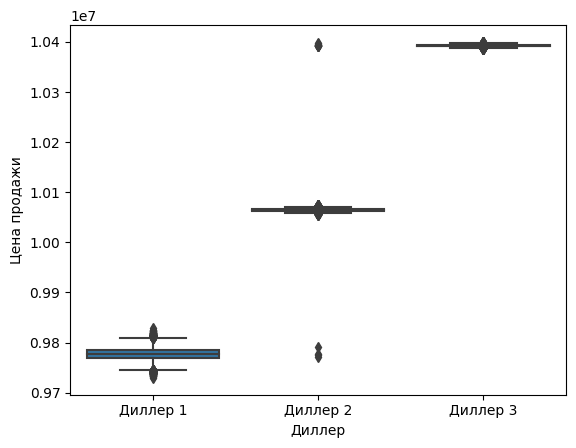

In [79]:
sns.boxplot(task3, x='Диллер', y='Цена продажи')

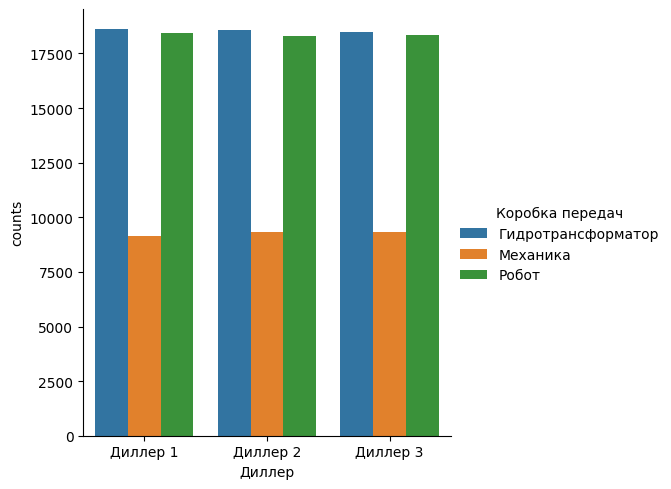

In [95]:
aggregated = task3.groupby(['Диллер', 'Коробка передач']).size().reset_index(name='counts')
sns.catplot(aggregated, x='Диллер', y='counts', hue='Коробка передач', kind='bar')

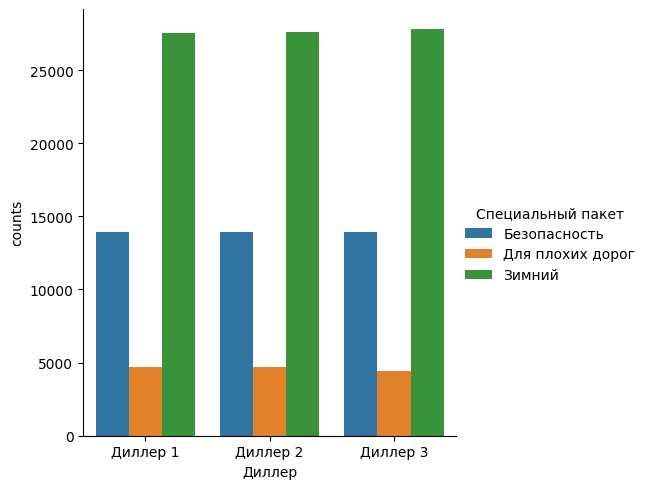

In [96]:
aggregated = task3.groupby(['Диллер', 'Специальный пакет']).size().reset_index(name='counts')
sns.catplot(aggregated, x='Диллер', y='counts', hue='Специальный пакет', kind='bar')

---
## ЗАДАЧА №5

Есть ли статистически значимая разница между Дилерами с точки зрения покупателя? Если есть ещё какие-то значимые факторы, которые, согласно данным, влияют на цену, то их тоже нужно включить в анализ.

Между какими группами есть разница, если есть? Если необходимо, примените поправку Холма-Бонферрони. В каком дилере в итоге выгоднее покупать машину? Ответ объясните.

Используем метод ANOVA для сравнения между группами:

In [122]:
grouped = task3.groupby(['Диллер'])
dealer1 = grouped.get_group('Диллер 1')['Цена продажи']
dealer2 = grouped.get_group('Диллер 2')['Цена продажи']
dealer3 = grouped.get_group('Диллер 3')['Цена продажи']

result = stats.f_oneway(dealer1, dealer2, dealer3)
print('p-value: ', result.pvalue.round(3))
print('statistic: ', result.statistic.round(3))

p-value:  0.0
statistic:  70940373.537


p-value меньше 0.05, а значит есть статистически значимая разница между группами. Для попарных сравнений будем использовать метод posthoc_ttest из библиотеки scikit_posthocs:

In [123]:
sp.posthoc_ttest([dealer1, dealer2, dealer3], p_adjust='holm').round(3)

,1,2,3
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0


Так как все попарные p-value меньше 0.05, то мы можем считать, что все выборки имеют разное распределение относительно друг друга.